# load dataset

In [1]:
from tqdm import trange, tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Goulburn.csv",parse_dates=["Date"])

In [3]:
dataset.head()

,Date,Conductivity,PH,Turbidity,Temperature
0,2009-07-06 00:00:00+10:00,66.0,NaN,NaN,9.8
1,2009-07-07 00:00:00+10:00,66.0,6.82,9.7,9.6
2,2009-07-08 00:00:00+10:00,67.0,6.58,9.7,9.3
3,2009-07-09 00:00:00+10:00,67.0,6.63,9.3,9.2
4,2009-07-10 00:00:00+10:00,69.0,6.71,9.6,9.3


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   Date          4301 non-null   datetime64[ns, pytz.FixedOffset(600)]
 1   Conductivity  4185 non-null   float64                              
 2   PH            3529 non-null   float64                              
 3   Turbidity     3820 non-null   float64                              
 4   Temperature   4156 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(600)](1), float64(4)
memory usage: 168.1 KB


In [5]:
# set datetime index
dataset.index = dataset.Date.copy()

In [6]:
# drop NaN
dataset.dropna(inplace=True)

In [7]:
# Normalize
dataset['PH_norm'] = (dataset.PH - dataset.PH.mean())/dataset.PH.std()
dataset['Conduct_norm'] = (dataset.Conductivity - dataset.Conductivity.mean())/dataset.Conductivity.std()
dataset['Temp_norm'] = (dataset.Temperature - dataset.Temperature.mean())/dataset.Temperature.std()
dataset['Turb_norm'] = (dataset.Turbidity - dataset.Turbidity.mean())/dataset.Turbidity.std()

In [8]:
dataset.head()

,Date,Conductivity,PH,Turbidity,Temperature,PH_norm,Conduct_norm,Temp_norm,Turb_norm
Date,,,,,,,,,
2009-07-07 00:00:00+10:00,2009-07-07 00:00:00+10:00,66.0,6.82,9.7,9.6,-0.831885,-0.424352,-1.343368,-0.517130
2009-07-08 00:00:00+10:00,2009-07-08 00:00:00+10:00,67.0,6.58,9.7,9.3,-1.676229,-0.390683,-1.410164,-0.517130
2009-07-09 00:00:00+10:00,2009-07-09 00:00:00+10:00,67.0,6.63,9.3,9.2,-1.500324,-0.390683,-1.432429,-0.531325
2009-07-10 00:00:00+10:00,2009-07-10 00:00:00+10:00,69.0,6.71,9.6,9.3,-1.218876,-0.323344,-1.410164,-0.520679
2009-07-11 00:00:00+10:00,2009-07-11 00:00:00+10:00,71.0,6.77,10.0,9.5,-1.007790,-0.256005,-1.365633,-0.506484


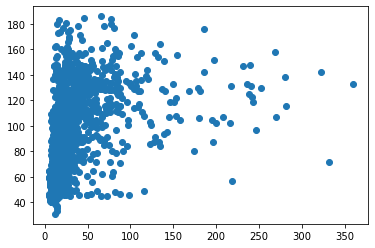

In [9]:
plt.scatter(dataset.Turbidity, dataset.Conductivity)

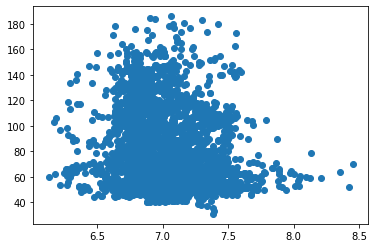

In [10]:
plt.scatter(dataset.PH, dataset.Conductivity)

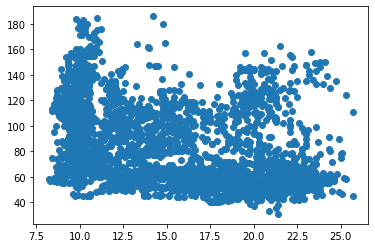

In [11]:
plt.scatter(dataset.Temperature, dataset.Conductivity)

<AxesSubplot:xlabel='Date'>

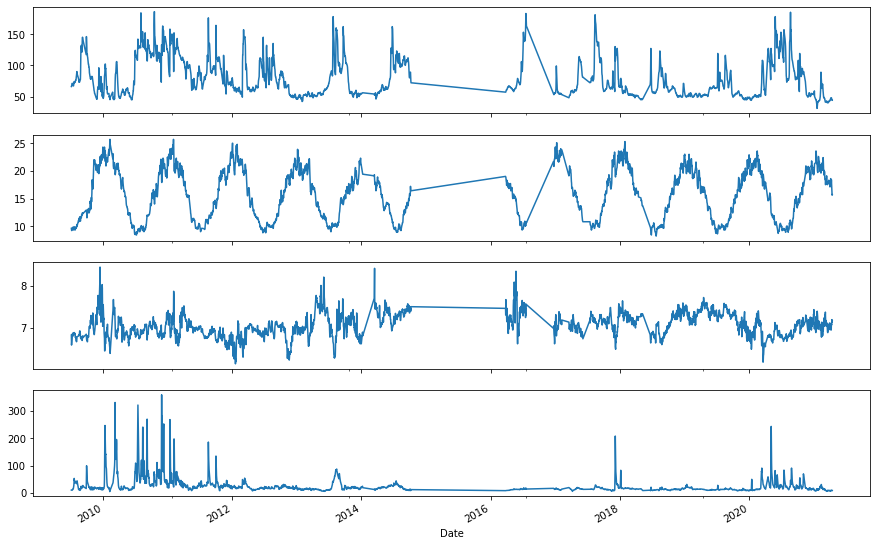

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
dataset.Conductivity.plot(ax=axes[0])
dataset.Temperature.plot(ax=axes[1])
dataset.PH.plot(ax=axes[2])
dataset.Turbidity.plot(ax=axes[3])

<AxesSubplot:>

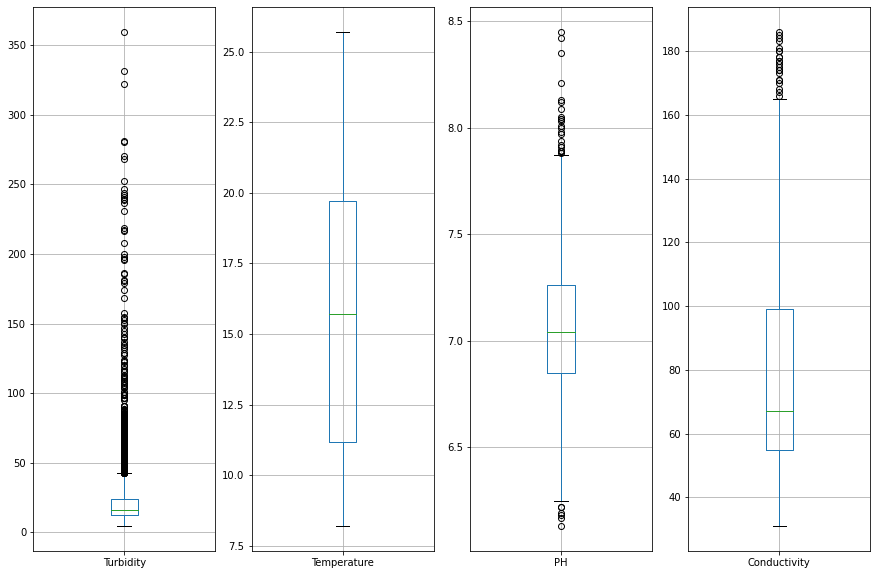

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(15)
dataset.boxplot(column="Turbidity", ax=axes[0])
dataset.boxplot(column="Temperature", ax=axes[1])
dataset.boxplot(column="PH", ax=axes[2])
dataset.boxplot(column="Conductivity", ax=axes[3])

<AxesSubplot:xlabel='Date'>

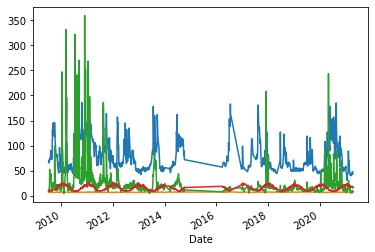

In [14]:
dataset.Conductivity.plot()
dataset.PH.plot()
dataset.Turbidity.plot()
dataset.Temperature.plot()

# split

In [15]:
import torch

In [16]:
X = dataset[["PH_norm", "Temp_norm", "Turb_norm"]]
y = dataset.Conduct_norm

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
X_train = torch.from_numpy(X_train.to_numpy()).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train.to_numpy()).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test.to_numpy()).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test.to_numpy()).type(torch.FloatTensor)

## build dataset

In [20]:
import os
import torch
from torch import nn
import torch.nn.functional as F

In [21]:
from torch.utils.data import Dataset, DataLoader

In [22]:
class TheDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [23]:
train_ds = TheDataset(X_train, y_train)
test_ds = TheDataset(X_test, y_test)

In [24]:
BATCH_SIZE = 10
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True)

## build model

In [25]:
baseline_model = torch.nn.Sequential(
    torch.nn.Linear(3, 4),
    torch.nn.Linear(4, 1),
)

In [26]:
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.RMSprop(baseline_model.parameters(), lr=1e-3)

In [27]:
def train_model(model, loss_fn, optimizer, train_dl):
    total = 0
    sum_loss = 0
    for index, (feats,target) in enumerate(train_dl):
        pred = model(feats)
        losses = loss_fn(pred, target)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        batch_size = feats.shape[0]
        total += batch_size
        sum_loss += batch_size*losses.item()
    return sum_loss/total

In [28]:
def train_loop(model, loss_fn, optim, epochs, train_dl):
    t = trange(epochs, desc='Bar desc', leave=True)
    for i in t:
        loss = train_model(model, loss_fn, optim, train_dl)
        if i % 10 == 0:
               t.set_description(f"loss = {loss}", refresh=True)

In [29]:
train_loop(baseline_model, loss_fn, optimizer, 100, train_loader)

Bar desc:   0%|                                                                                                      | 0/100 [00:00<?, ?it/s]C:\Users\giang\miniconda3\envs\misc\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\giang\miniconda3\envs\misc\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
loss = 1.0069706658377966: 100%|███████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.18it/s]


- [x] get parameters
- [x] calculate residuals
- [x] bootstrapping residuals
- [x] generate new synthetic datasets from sampled residuals
- [x] estimate parameters for each model trained on each new synthetic dataset
- [x] aggregate all parameters from all models
- [x] Calculate covariance and means of these all parameters
- [x] MCMC from this covariance and means to more sets of parameters
- [x] create models from these set of parameters, validate on test set
- [x] plot uncertainty of output

In [30]:
baseline_model.eval()
residuals = y_train - baseline_model(X_train).squeeze()

In [31]:
residuals.shape

torch.Size([2478])

### residual bootstrapping

In [32]:
from sklearn.utils import resample

In [33]:
bootstrap_residuals = []
for i in range(30):
    bootstrap_residual = resample(residuals.detach(), n_samples=residuals.shape[0], replace=True)
    bootstrap_residuals.append(bootstrap_residual)

In [34]:
residuals

tensor([-0.6560, -0.7744, -0.0702,  ...,  1.8431, -0.9057,  1.1479],
       grad_fn=<SubBackward0>)

In [35]:
bootstrap_residuals

[tensor([ 1.3938, -0.8955, -0.9965,  ..., -0.8499, -0.3050, -0.1302]),
 tensor([ 0.6620, -0.9113, -0.3192,  ..., -1.0208, -0.7290, -1.0413]),
 tensor([-0.8830,  0.3981,  1.1177,  ...,  1.3561,  0.8814,  1.2646]),
 tensor([-0.8782,  1.6083, -0.5593,  ..., -0.9249,  2.1496, -0.7014]),
 tensor([-0.5444,  0.4572,  1.1722,  ..., -0.1728, -0.6225,  0.0153]),
 tensor([ 0.6897,  1.2876, -0.4185,  ..., -1.0115,  1.6955,  0.2224]),
 tensor([ 1.4631e+00,  1.5881e-01,  2.1496e+00,  ...,  1.8387e+00,
          8.9297e-01, -1.0259e-03]),
 tensor([ 0.4145, -0.5816, -1.0117,  ...,  0.6127, -0.7223, -0.6618]),
 tensor([ 2.5343,  1.0286, -0.9961,  ..., -1.2151, -1.0454, -0.9208]),
 tensor([-0.0415, -0.2867, -0.8392,  ..., -0.6377,  0.6759, -0.8124]),
 tensor([-0.3568, -0.8061, -0.7691,  ..., -0.8724, -0.3887,  0.0181]),
 tensor([ 0.2805,  0.4557,  0.8002,  ...,  1.0499, -0.5265, -0.7173]),
 tensor([-0.5660, -0.4554,  0.5046,  ..., -0.5314,  2.2088,  0.8158]),
 tensor([-0.7709, -0.4115,  0.9093,  ...,  0

## generate synthetic dataset

In [36]:
synthetic_datasets = []
for bootstrap_residual in bootstrap_residuals:
    synthetic_y = baseline_model(X_train).squeeze().detach() + bootstrap_residual
    synthetic_datasets.append({"feats": X_train, "target": synthetic_y})

In [37]:
synthetic_datasets[0]["target"].shape

torch.Size([2478])

In [38]:
y_train

tensor([-0.6937, -0.8284, -0.1213,  ...,  2.0335, -0.9631,  1.1244])

In [39]:
synthetic_datasets[0]["target"]

tensor([ 1.3561, -0.9494, -1.0476,  ..., -0.6595, -0.3623, -0.1536])

In [40]:
list(baseline_model.parameters())

[Parameter containing:
 tensor([[-0.0182, -0.0448, -0.0165],
         [ 0.1730, -0.0008,  0.3259],
         [ 0.3303,  0.3160, -0.3112],
         [-0.3441, -0.3703, -0.0289]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0230,  0.2137, -0.4849,  0.4270], requires_grad=True),
 Parameter containing:
 tensor([[-0.0176,  0.0997, -0.0462,  0.0368]], requires_grad=True),
 Parameter containing:
 tensor([-0.0661], requires_grad=True)]

## train synthetic models

In [41]:
synthetic_models = []
for synthetic_dataset in synthetic_datasets:
    feats = synthetic_dataset["feats"]
    target = synthetic_dataset["target"]
    train_dl = DataLoader(TheDataset(feats, target), batch_size=BATCH_SIZE, shuffle=True)
    model = torch.nn.Sequential(
        torch.nn.Linear(3, 4),
        torch.nn.Linear(4, 1),
    )
    loss_fn = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.RMSprop(baseline_model.parameters(), lr=1e-3)
    train_loop(model, loss_fn, optimizer, 100, train_dl)
    synthetic_models.append(model)

loss = 0.9375858960178612: 100%|███████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.89it/s]


In [42]:
for synthetic_model in synthetic_models:
    synthetic_model.eval()

In [43]:
list(synthetic_models[0].parameters())

[Parameter containing:
 tensor([[ 0.2858, -0.3448,  0.1639],
         [-0.3405,  0.5424,  0.3288],
         [ 0.1514, -0.3833,  0.2411],
         [ 0.5667,  0.1355,  0.5364]], requires_grad=True),
 Parameter containing:
 tensor([-0.2520, -0.1362, -0.2469,  0.1695], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2257,  0.2044,  0.2105, -0.4861]], requires_grad=True),
 Parameter containing:
 tensor([-0.4186], requires_grad=True)]

## aggregate parameters from trained synthetic models

In [44]:
parameter_structure = []
for index, module in enumerate(baseline_model.modules()):
    if not isinstance(module, nn.Sequential):
        parameter_structure.append({"index": index-1, "type": "weight", "size": module.weight.size(), "nelement": module.weight.nelement()})
        parameter_structure.append({"index": index-1, "type": "bias", "size": module.bias.size(), "nelement": module.bias.nelement()})

In [45]:
parameter_structure

[{'index': 0, 'type': 'weight', 'size': torch.Size([4, 3]), 'nelement': 12},
 {'index': 0, 'type': 'bias', 'size': torch.Size([4]), 'nelement': 4},
 {'index': 1, 'type': 'weight', 'size': torch.Size([1, 4]), 'nelement': 4},
 {'index': 1, 'type': 'bias', 'size': torch.Size([1]), 'nelement': 1}]

In [46]:
aggregated_params = []
for synthetic_model in synthetic_models:
    params = [p.detach() for p in synthetic_model.parameters()]
    concat_params = torch.cat([p.reshape(-1) for p in params])
    aggregated_params.append(concat_params)

In [47]:
aggregated_params[0]

tensor([ 0.2858, -0.3448,  0.1639, -0.3405,  0.5424,  0.3288,  0.1514, -0.3833,
         0.2411,  0.5667,  0.1355,  0.5364, -0.2520, -0.1362, -0.2469,  0.1695,
         0.2257,  0.2044,  0.2105, -0.4861, -0.4186])

In [48]:
all_params = torch.vstack(aggregated_params)

## calculate means and covariance matrix of synthetic parameters, create multivariate normal distribution and random sampling 100 sets of parameters

In [50]:
means = np.mean(all_params.numpy(), axis=0)

In [52]:
cov_mat = np.cov(all_params.numpy().T)

In [54]:
from scipy.stats import multivariate_normal

In [55]:
params_dist = multivariate_normal(mean=means, cov=cov_mat)

In [56]:
mc_params = params_dist.rvs(size=100)

In [58]:
mc_params = torch.Tensor(mc_params).type(torch.float32)

In [59]:
mc_params

tensor([[ 0.1167, -0.4333,  0.0631,  ...,  0.1084, -0.0900,  0.0098],
        [ 0.2512, -0.3052, -0.0640,  ...,  0.1645, -0.2383, -0.6552],
        [-0.3372, -0.0494, -0.1128,  ...,  0.3365,  0.1530, -0.0134],
        ...,
        [-0.1234,  0.5069,  0.3924,  ..., -0.2952,  0.3350, -0.4100],
        [-0.4269, -0.0797, -0.2203,  ...,  0.1689, -0.1437,  0.4242],
        [ 0.2327, -0.2046, -0.1569,  ...,  0.0255, -0.2900, -0.8315]])

## create models with MC generated sets of params

In [60]:
mc_model = torch.nn.Sequential(
    torch.nn.Linear(3, 4),
    torch.nn.Linear(4, 1),
)


In [62]:
mc_models = []
for params in mc_params:
    mc_model = torch.nn.Sequential(
        torch.nn.Linear(3, 4),
        torch.nn.Linear(4, 1),
    )
    # assign params
    index = 0
    for param_struct in parameter_structure:
        layer_index = param_struct["index"]
        param_type = param_struct["type"]
        param_size = param_struct["size"]
        nelement = param_struct["nelement"]
        nelement = index + nelement
        param = params[index:nelement].reshape(param_size)
        model_layer = mc_model[layer_index]
        setattr(model_layer, param_type, nn.Parameter(param))
        index = nelement
    mc_models.append(mc_model)

In [63]:
len(mc_models)

100

# Uncertainty boxplot

In [67]:
mc_predictions = []
for mc_model in mc_models:
    mc_model.eval()
    mc_prediction = mc_model(X_test).squeeze()
    mc_predictions.append(mc_prediction)

In [73]:
mc_predictions = torch.vstack(mc_predictions)

In [108]:
mc_predictions = mc_predictions.detach().numpy()

In [109]:
mc_predictions = pd.DataFrame(mc_predictions)

In [110]:
mc_predictions

,0,1,2,3,4,5,6,7,8,9,...,816,817,818,819,820,821,822,823,824,825
0,-0.188435,0.064364,-0.157361,-0.168568,-0.030471,-0.580346,-0.250173,-0.521111,-0.133041,-0.197421,...,-0.315387,-0.311533,-0.120846,0.060117,-0.544626,-0.103853,-0.427514,-0.317569,-0.398454,-0.463030
1,-0.698614,-0.512715,-0.442359,-0.605774,-0.626164,-0.843486,-0.561938,-0.888153,-0.615795,-0.941111,...,-0.666497,-0.679945,-0.973325,-0.740472,-0.879288,-0.592993,-0.697896,-0.698945,-0.788885,-0.713337
2,-0.248390,-0.270666,-0.305842,-0.290821,-0.245528,-0.242534,-0.318178,-0.238917,-0.290763,-0.228446,...,-0.304953,-0.291192,-0.230845,-0.216628,-0.265624,-0.284855,-0.270358,-0.269446,-0.268875,-0.250181
3,0.157000,0.076821,-0.040189,0.023686,0.160766,0.180412,-0.063112,0.198385,0.026240,0.245279,...,-0.013642,0.027764,0.244890,0.261351,0.119749,0.041184,0.086393,0.092538,0.103265,0.145287
4,0.570194,0.726186,0.751295,0.876143,0.567319,0.375066,1.007179,0.477347,0.929613,0.788318,...,0.989718,0.870603,0.949933,0.556957,0.723668,0.854328,0.562850,0.666017,0.741757,0.338848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.028523,-0.062638,0.142695,0.270085,-0.153614,0.078669,0.469895,0.132941,0.295479,0.187710,...,0.499003,0.374631,0.288887,-0.241790,0.401578,0.197110,0.154348,0.171288,0.307982,-0.045024
96,-0.143016,-0.214521,-0.442523,-0.521574,-0.052677,-0.150004,-0.753663,-0.202936,-0.551759,-0.292350,...,-0.736114,-0.590119,-0.406017,0.078864,-0.508122,-0.453258,-0.315649,-0.350766,-0.458851,-0.077835
97,-0.312616,-0.553212,-0.132701,0.157747,-0.624750,0.096722,0.520012,0.183342,0.190605,0.162150,...,0.639880,0.428717,0.317488,-0.769632,0.653975,-0.000896,0.104367,0.087500,0.394059,-0.218932
98,0.001523,-0.224164,-0.208279,0.002781,-0.128807,0.221984,0.031178,0.280344,0.018184,0.322991,...,0.154287,0.126717,0.382428,-0.048750,0.362043,-0.040409,0.083186,0.079710,0.224737,0.036550


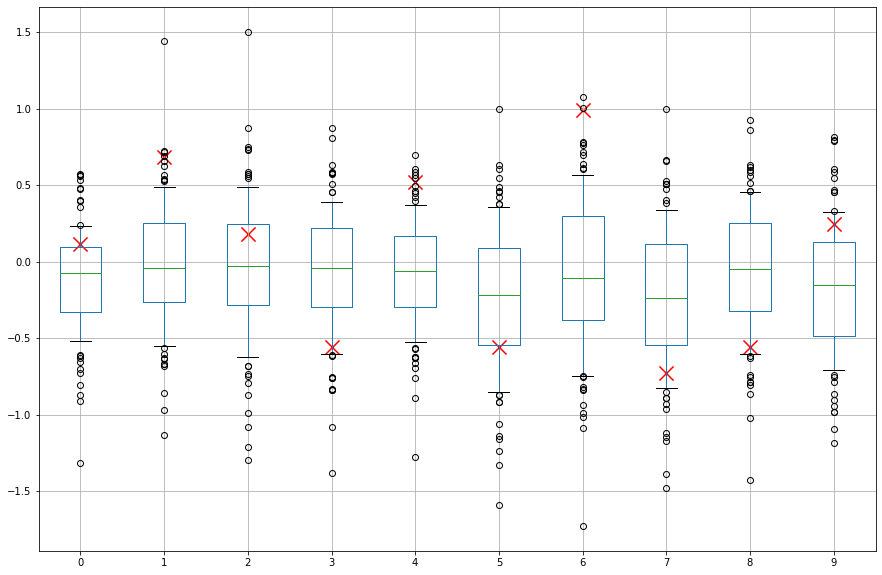

In [122]:
ax = plt.subplot()
ax.figure.set_figwidth(15)
ax.figure.set_figheight(10)
mc_predictions.boxplot(figsize=(20, 20), column=list(range(10)), ax=ax, whis=(10, 90))
ax.scatter(range(1,11), y_test[:10], marker="x", c="r", s=200)